In [26]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [27]:
df = pd.read_csv('/home/isaacp/research/repos/EvMatsim/contribs/ev/scenarios/utahev/output/ITERS/it.0/0.countscompare.txt', sep='\t')

In [28]:
df['Link Id'].unique()

array([12975,  6086])

In [29]:
link = 12975
dflink = df[df['Link Id'] == link]
dflink.head()

,Link Id,Count Station Id,Hour,MATSIM volumes,Count volumes,Relative Error,Normalized Relative Error,GEH
0,12975,407,1,121,735,-0.835,0.835,29.679
1,12975,407,2,77,451,-0.829,0.829,23.018
2,12975,407,3,54,488,-0.889,0.889,26.364
3,12975,407,4,44,585,-0.925,0.925,30.506
4,12975,407,5,52,1278,-0.959,0.959,47.542


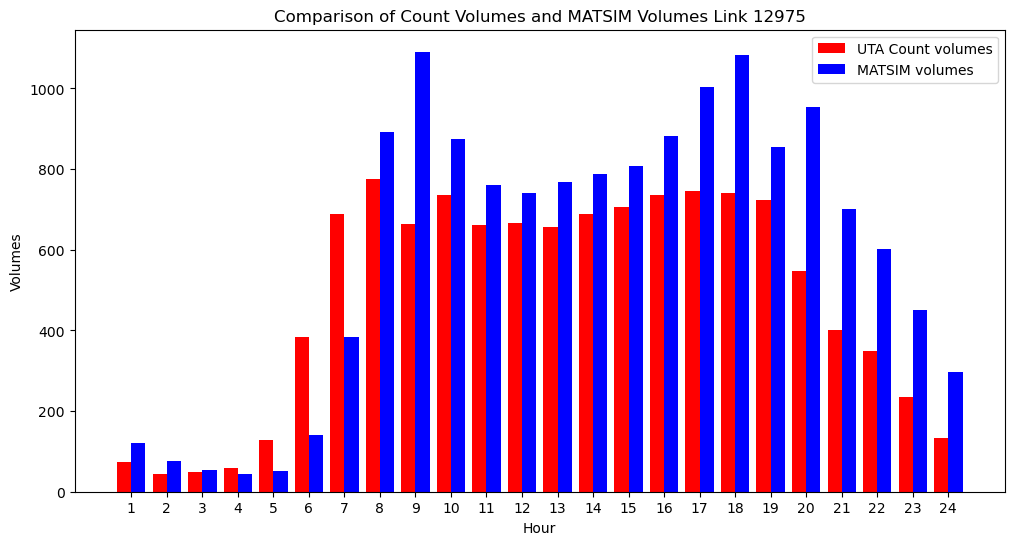

In [30]:
unique_hours = pd.unique(dflink['Hour'])
bar_width = 0.4  # Width of each bar

# X positions for each set of bars
r1 = np.arange(len(unique_hours))
r2 = [x + bar_width for x in r1]

plt.figure(figsize=(12, 6))

# Plot Count volumes histogram
plt.bar(r1, dflink['Count volumes'] / 10, color='red', width=bar_width, label='UTA Count volumes')

# Plot MATSIM volumes histogram
plt.bar(r2, dflink['MATSIM volumes'], color='blue', width=bar_width, label='MATSIM volumes')

# Labels, title, and legend
plt.xlabel('Hour')
plt.ylabel('Volumes')
plt.title(f'Comparison of Count Volumes and MATSIM Volumes Link {link}')
plt.xticks([r + bar_width / 2 for r in range(len(unique_hours))], unique_hours)
plt.legend()

plt.show()